# 1. Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# 2. Data Exploration

### A. Data Loading

In [32]:
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

try:
    train_df = pd.read_csv('training.csv', names=['text', 'label'], header=0)
    test_df = pd.read_csv('test.csv', names=['text', 'label'], header=0)
    validation_df = pd.read_csv('validation.csv', names=['text', 'label'], header=0)
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading datasets: {e}")
    train_df = pd.DataFrame(columns=['text', 'label'])
    test_df = pd.DataFrame(columns=['text', 'label'])
    validation_df = pd.DataFrame(columns=['text', 'label'])

Datasets loaded successfully.


### B. Data Inspection

In [33]:
print("First 10 rows of the training dataset:")
train_df.head(10)

First 10 rows of the training dataset:


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2


In [34]:
print("Dataset Volume")
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")
print(f"Validation set size: {len(validation_df)}")

Dataset Volume
Training set size: 16000
Test set size: 2000
Validation set size: 2000


In [35]:
print("\nTraining DataFrame Info:")
train_df.info()
print("\nTest DataFrame Info:")
test_df.info()
print("\nValidation DataFrame Info:")
validation_df.info()


Training DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB

Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB

Validation DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [36]:
print("\nTraining Dataframe description:")
train_df.describe()


Training Dataframe description:


,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [37]:
print("\nTest Dataframe description:")
test_df.describe()


Test Dataframe description:


,label
count,2000.00000
mean,1.53200
std,1.47447
min,0.00000
25%,0.00000
50%,1.00000
75%,3.00000
max,5.00000


In [38]:
print("\nValidation Dataframe description:")
validation_df.describe()


Validation Dataframe description:


,label
count,2000.000000
mean,1.569000
std,1.480991
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


### C. Data Balance Checking

In [39]:
print("\nEmotion Distribution in Training Set:")
counts = train_df['label'].value_counts().sort_index()

for label_num, count in counts.items():
    emotion_name = label_map.get(label_num, f"Label {label_num}")
    print(f"{emotion_name:<10}: {count}")


Emotion Distribution in Training Set:
Sadness   : 4666
Joy       : 5362
Love      : 1304
Anger     : 2159
Fear      : 1937
Surprise  : 572


### D. Exploratory Data Analysis

##### Feature Engineering

In [40]:
# Mapping numeric values to names for better graphs
train_df['emotion_name'] = train_df['label'].map(label_map)
# creating numbers from text for correlation matrix
train_df['char_count'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))
train_df['avg_word_len'] = train_df['char_count'] / train_df['word_count']

##### Correlation matrix and Heatmap

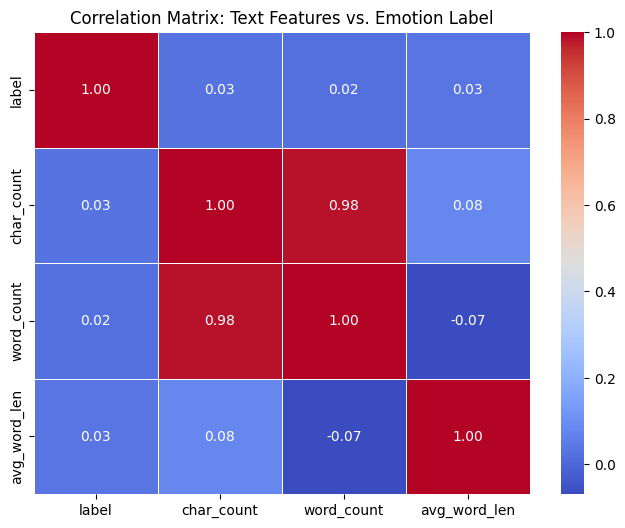

In [41]:
numeric_features = train_df[['label', 'char_count', 'word_count', 'avg_word_len']]
corr_matrix = numeric_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Text Features vs. Emotion Label')
plt.show()

##### Distribution Graphs

C:\Users\Chacha\AppData\Local\Temp\ipykernel_24292\2570528651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='emotion_name', y='word_count', palette='pastel')


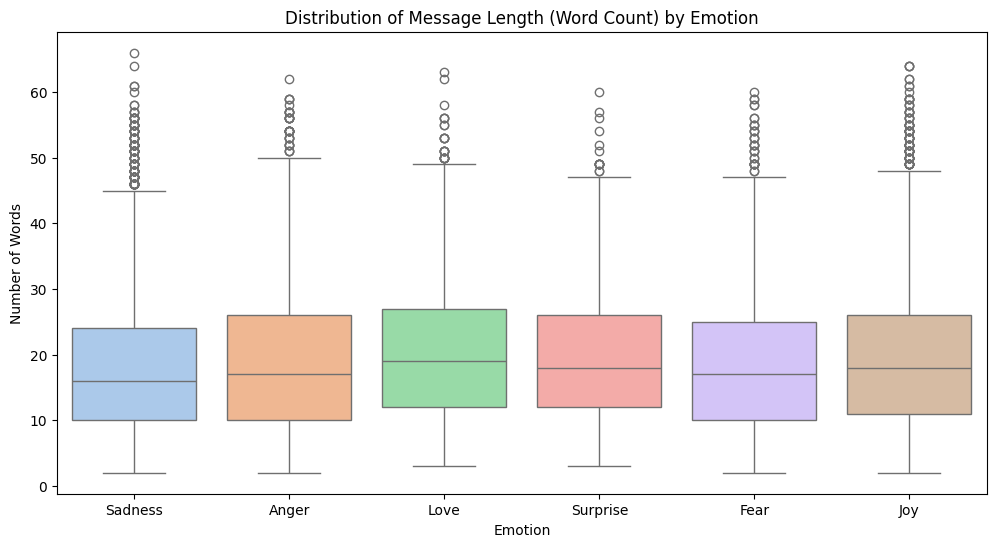

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='emotion_name', y='word_count', palette='pastel')
plt.title('Distribution of Message Length (Word Count) by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Number of Words')
plt.show()

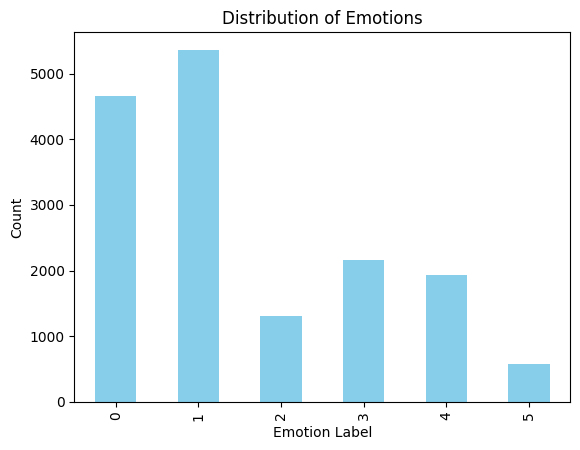

In [43]:
counts.plot(kind='bar', title='Distribution of Emotions', color='skyblue')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.show()

##### KDE Plot

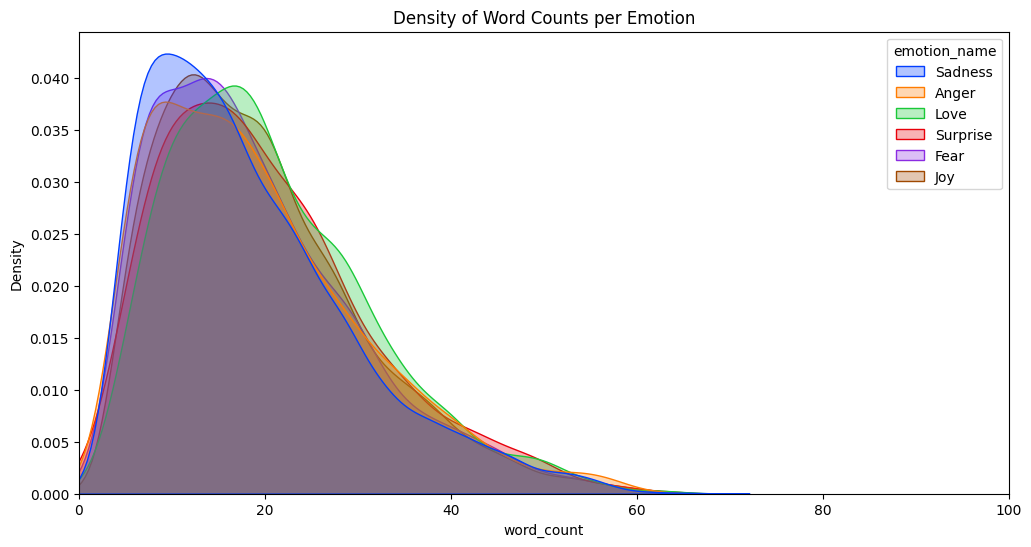

In [44]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=train_df, x='word_count', hue='emotion_name', fill=True, common_norm=False, palette='bright', alpha=0.3)
plt.title('Density of Word Counts per Emotion')
plt.xlim(0, 100) 
plt.show()

### E. Data Cleaning

In [54]:
# NLTK Downloads
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Custom noise words
stop_words.update(['im', 'wa', 'ha', 'didnt', 'wasnt', 'werent', 'dont', 'u'])

# LOAD DATASETS 
train_df = pd.read_csv('training.csv', names=['text', 'label'], header=0)
test_df = pd.read_csv('test.csv', names=['text', 'label'], header=0)
validation_df = pd.read_csv('validation.csv', names=['text', 'label'], header=0)

# POS TAGGING 
def get_wordnet_pos(word):
    try:
        tag = nltk.pos_tag([word])[0][1][0].upper()
    except LookupError:
        # Fallback if the tagger fails (shouldn't happen with the download above)
        return wordnet.NOUN
        
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

# --- 4. CLEANING FUNCTION ---
def clean_text(text):
    if not isinstance(text, str): 
        return ""
    
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    
    cleaned_words = []
    for word in words:
        if word not in stop_words:
            # Smart Lemmatization
            pos = get_wordnet_pos(word)
            lemmatized_word = lemmatizer.lemmatize(word, pos)
            cleaned_words.append(lemmatized_word)

    return ' '.join(cleaned_words)

# --- 5. APPLICATION ---
print("⏳ Cleaning training data... (This may take a minute)")
train_df['clean_text'] = train_df['text'].apply(clean_text)

print("⏳ Cleaning test & validation data...")
test_df['clean_text'] = test_df['text'].apply(clean_text)
validation_df['clean_text'] = validation_df['text'].apply(clean_text)

# --- 6. VERIFICATION ---
print("\n✅ Success! Sample cleaned data:")
print(train_df[['text', 'clean_text']].sample(10))

⏳ Cleaning training data... (This may take a minute)
⏳ Cleaning test & validation data...

✅ Success! Sample cleaned data:
                                                    text  \
8449   i do feel pressure to provide my faithful read...   
2003   i feel like i get easily distracted in making ...   
4942   i still feel like i get walked all over but we...   
7069               i honestly feel a little bit relieved   
13373  i feel rotten and my frustration manifests as ...   
7457                      i feel he is talented and good   
1328   i say no i feel guilty begins by giving you th...   
7292   i feel terrible for pretty much abandoning my ...   
12532  i feel like i am one of them now before i resi...   
14871                                 im just feel alone   

                                              clean_text  
8449   feel pressure provide faithful reader mock dra...  
2003   feel like get easily distracted making thing s...  
4942              still feel like get w